<a href="https://colab.research.google.com/github/MFahadHussain/MFahadHussain/blob/main/TransformationETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/final_depression_dataset_1.csv'  # Replace this with the actual file path or name
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 Rows of the Dataset:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
data.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Display missing values count
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


First 5 Rows of the Dataset:
      Name  Gender  Age       City Working Professional or Student  \
0    Pooja  Female   37  Ghaziabad            Working Professional   
1  Reyansh    Male   60     Kalyan            Working Professional   
2    Manvi  Female   42     Bhopal            Working Professional   
3     Isha  Female   44      Thane            Working Professional   
4    Aarav    Male   48     Indore            Working Professional   

          Profession  Academic Pressure  Work Pressure  CGPA  \
0            Teacher                NaN            2.0   NaN   
1  Financial Analyst                NaN            4.0   NaN   
2            Teacher                NaN            2.0   NaN   
3            Teacher                NaN            3.0   NaN   
4     UX/UI Designer                NaN            4.0   NaN   

   Study Satisfaction  Job Satisfaction Sleep Duration Dietary Habits Degree  \
0                 NaN               4.0      7-8 hours       Moderate     MA   
1    

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Assuming the file name is 'final_depression_dataset_1.csv'
data = pd.read_csv('final_depression_dataset_1.csv')

# Step 1: Explore the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nMissing Values:")
print(data.isnull().sum())

# Step 2: Preprocessing
# Handle missing values
# Impute numerical columns with median and categorical columns with mode
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Normalize/Scale numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Step 3: Feature Engineering
# Add specific feature engineering steps based on provided dataset

# Interaction term: Combining Work Pressure and Job Satisfaction
data['work_job_interaction'] = data['Work Pressure'] * data['Job Satisfaction']

# Binary feature: Whether CGPA is above average (based on 7.5 threshold)
data['high_cgpa'] = np.where(data['CGPA'] > 7.5, 1, 0)

# Log transformation of Financial Stress
data['log_financial_stress'] = np.log1p(data['Financial Stress'])

# Extract Sleep Duration range (convert categories to integers, e.g., 5-6 hours -> 5)
data['Sleep Duration'] = data['Sleep Duration'].astype(str)  # Ensure all entries are string
sleep_duration_numeric = data['Sleep Duration'].str.extract(r'(\d+)', expand=False)
data['sleep_duration_hours'] = pd.to_numeric(sleep_duration_numeric, errors='coerce').fillna(0).astype(int)

# Encoding "Have you ever had suicidal thoughts?" as binary
data['suicidal_thoughts'] = np.where(data['Have you ever had suicidal thoughts ?'] == 'Yes', 1, 0)

# Encoding "Family History of Mental Illness" as binary
data['family_mental_illness'] = np.where(data['Family History of Mental Illness'] == 'Yes', 1, 0)

# Step 4: Save the transformed dataset
output_file = 'transformed_dataset.csv'
data.to_csv(output_file, index=False)

print(f"Transformed dataset saved to {output_file}")

# Display a summary of the transformed dataset
print("\nTransformed Dataset Head:")
print(data.head())


Saving final_depression_dataset_1.csv to final_depression_dataset_1.csv
Dataset Head:
      Name  Gender  Age       City Working Professional or Student  \
0    Pooja  Female   37  Ghaziabad            Working Professional   
1  Reyansh    Male   60     Kalyan            Working Professional   
2    Manvi  Female   42     Bhopal            Working Professional   
3     Isha  Female   44      Thane            Working Professional   
4    Aarav    Male   48     Indore            Working Professional   

          Profession  Academic Pressure  Work Pressure  CGPA  \
0            Teacher                NaN            2.0   NaN   
1  Financial Analyst                NaN            4.0   NaN   
2            Teacher                NaN            2.0   NaN   
3            Teacher                NaN            3.0   NaN   
4     UX/UI Designer                NaN            4.0   NaN   

   Study Satisfaction  Job Satisfaction Sleep Duration Dietary Habits Degree  \
0                 NaN       

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


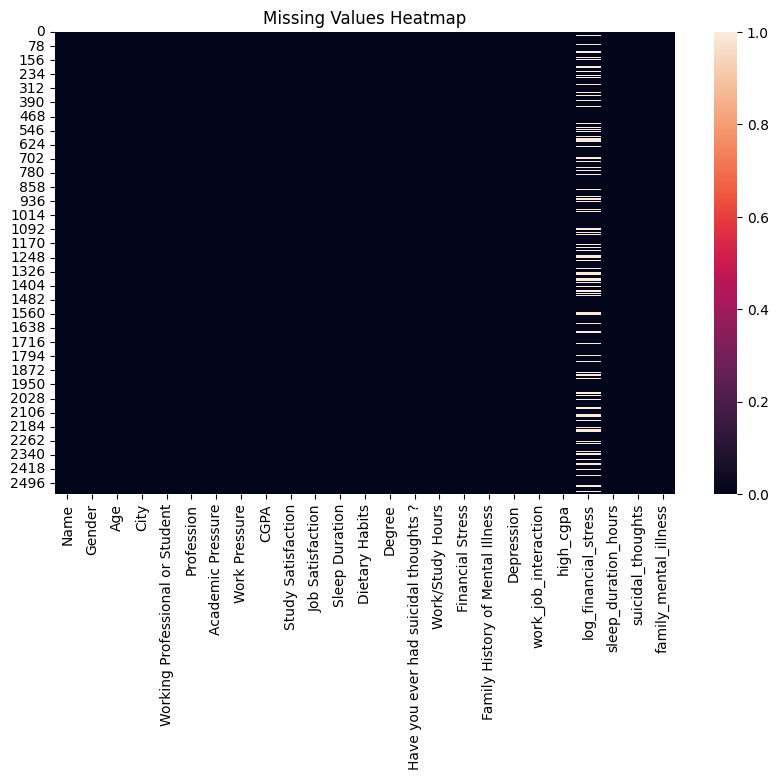

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull())
plt.title('Missing Values Heatmap')
plt.show()


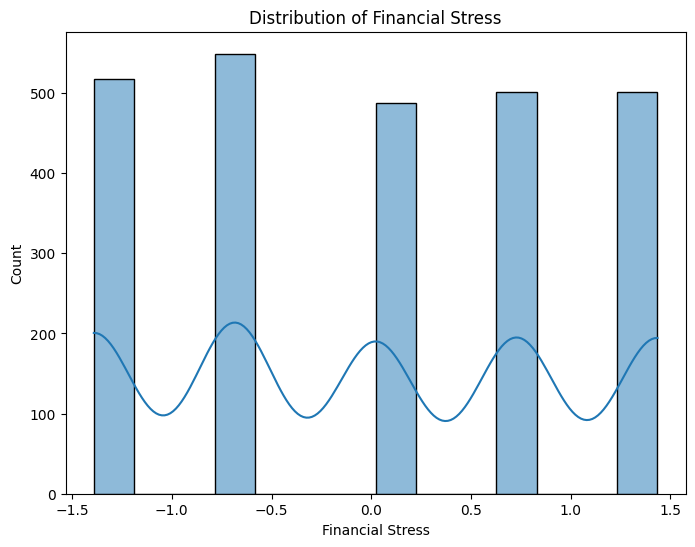

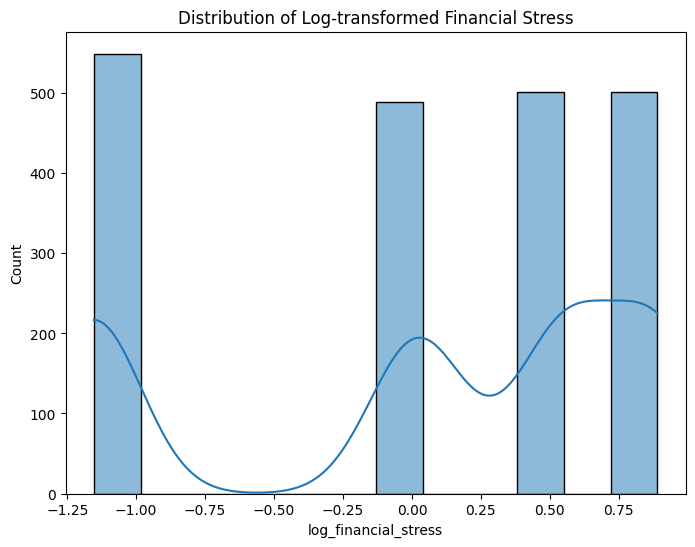

In [6]:
# Distribution of Financial Stress (Before Transformation)
plt.figure(figsize=(8, 6))
sns.histplot(data['Financial Stress'], kde=True)
plt.title('Distribution of Financial Stress')
plt.show()

# Log-transformed Financial Stress
plt.figure(figsize=(8, 6))
sns.histplot(data['log_financial_stress'], kde=True)
plt.title('Distribution of Log-transformed Financial Stress')
plt.show()


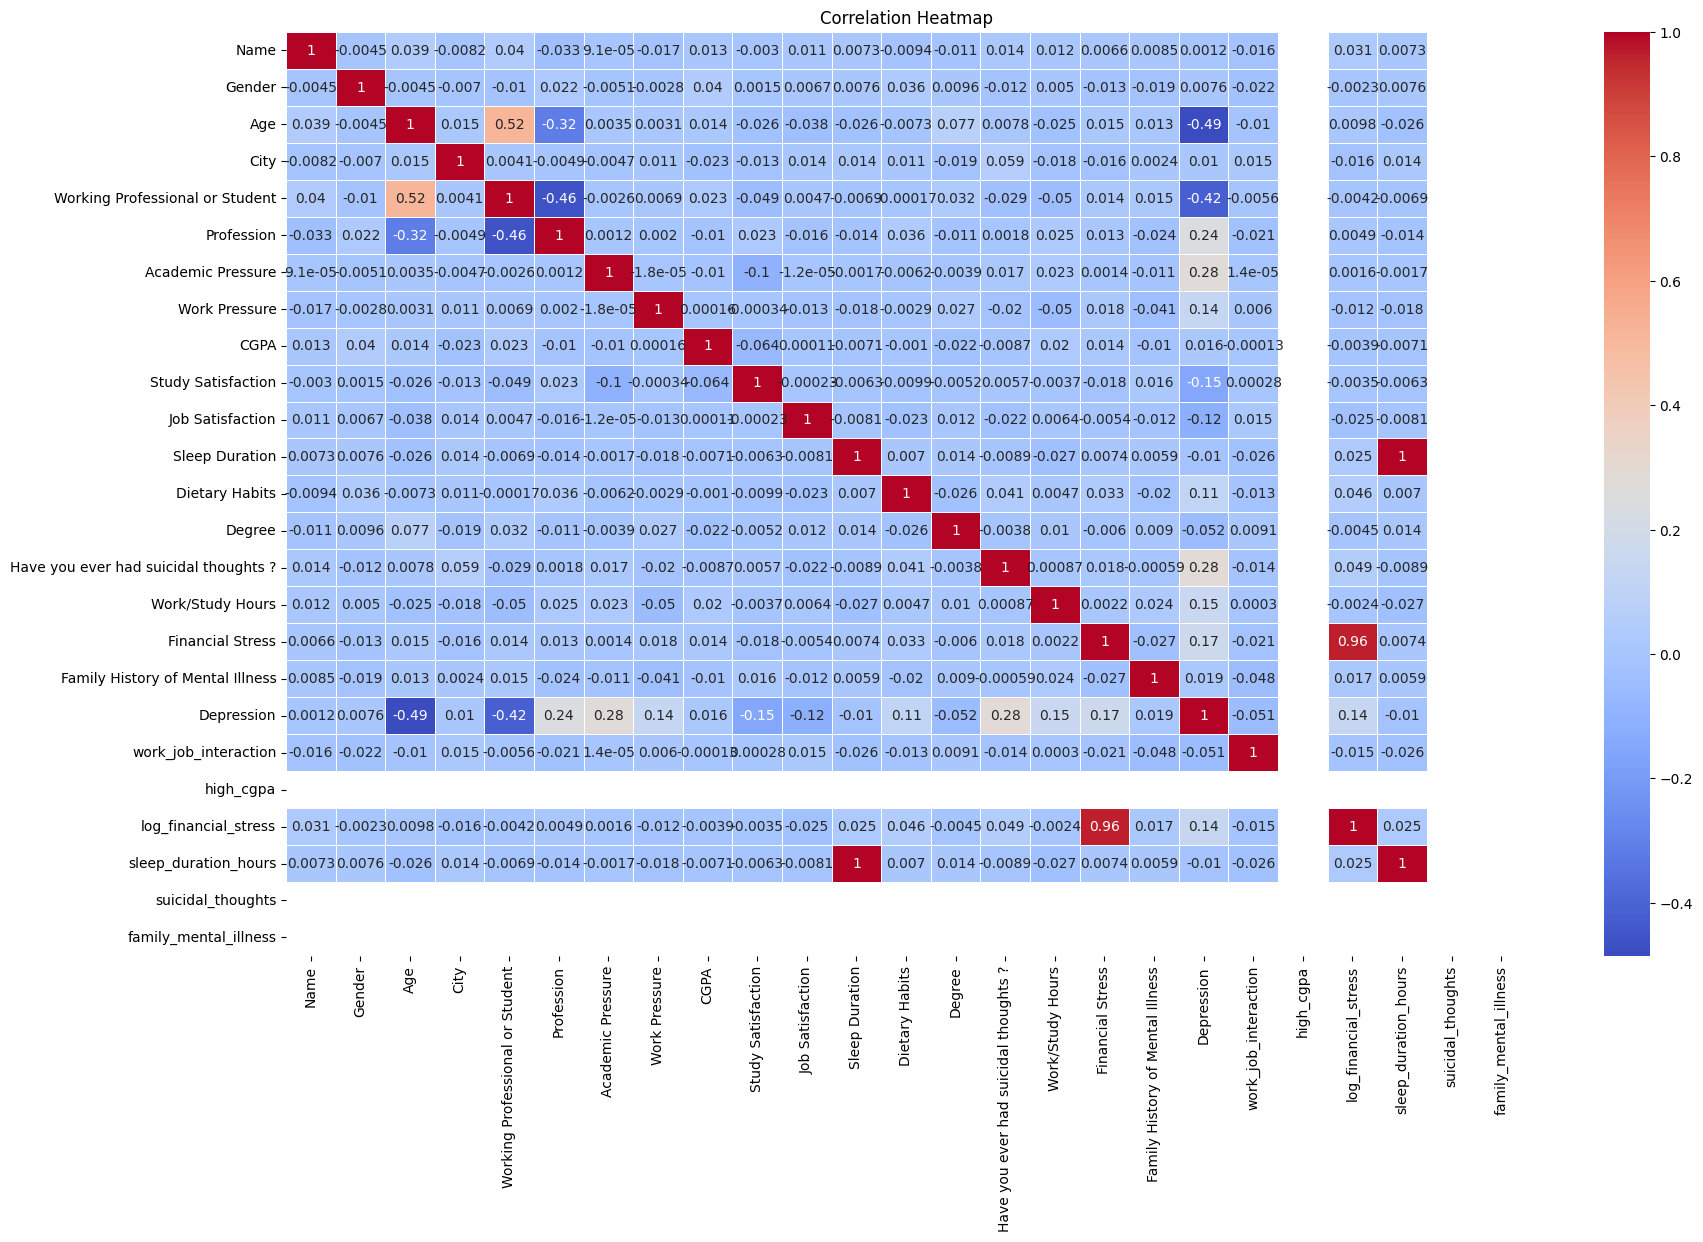

In [9]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


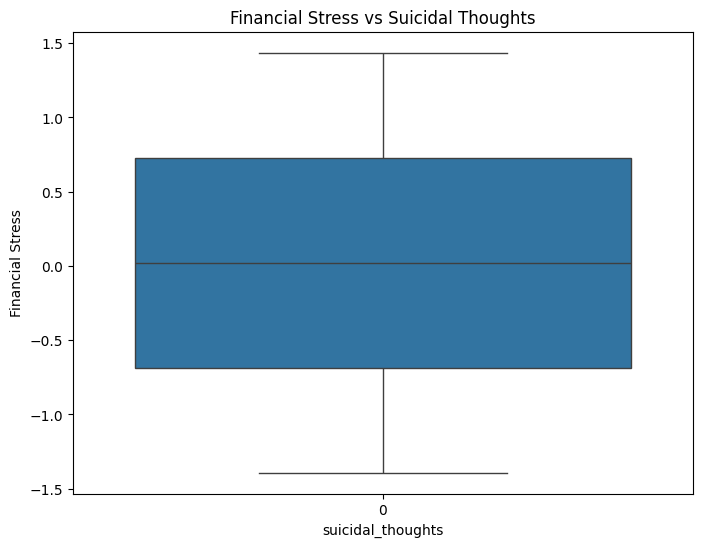

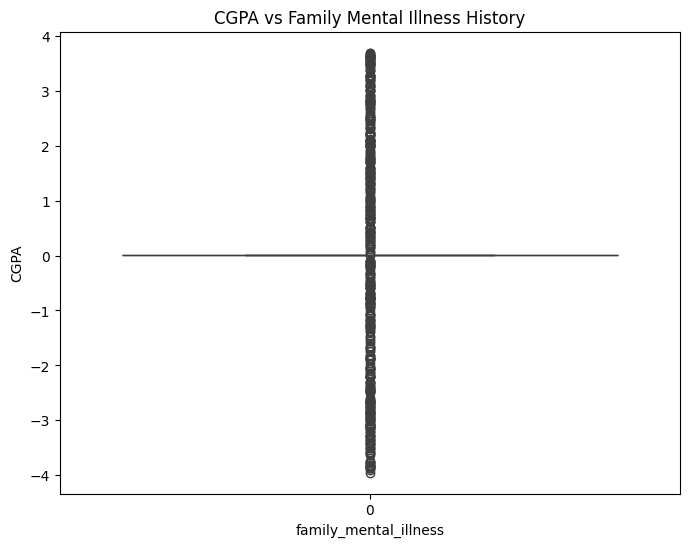

In [10]:
# Boxplot for Financial Stress vs Suicidal Thoughts
plt.figure(figsize=(8, 6))
sns.boxplot(x='suicidal_thoughts', y='Financial Stress', data=data)
plt.title('Financial Stress vs Suicidal Thoughts')
plt.show()

# Boxplot for CGPA vs Family Mental Illness History
plt.figure(figsize=(8, 6))
sns.boxplot(x='family_mental_illness', y='CGPA', data=data)
plt.title('CGPA vs Family Mental Illness History')
plt.show()


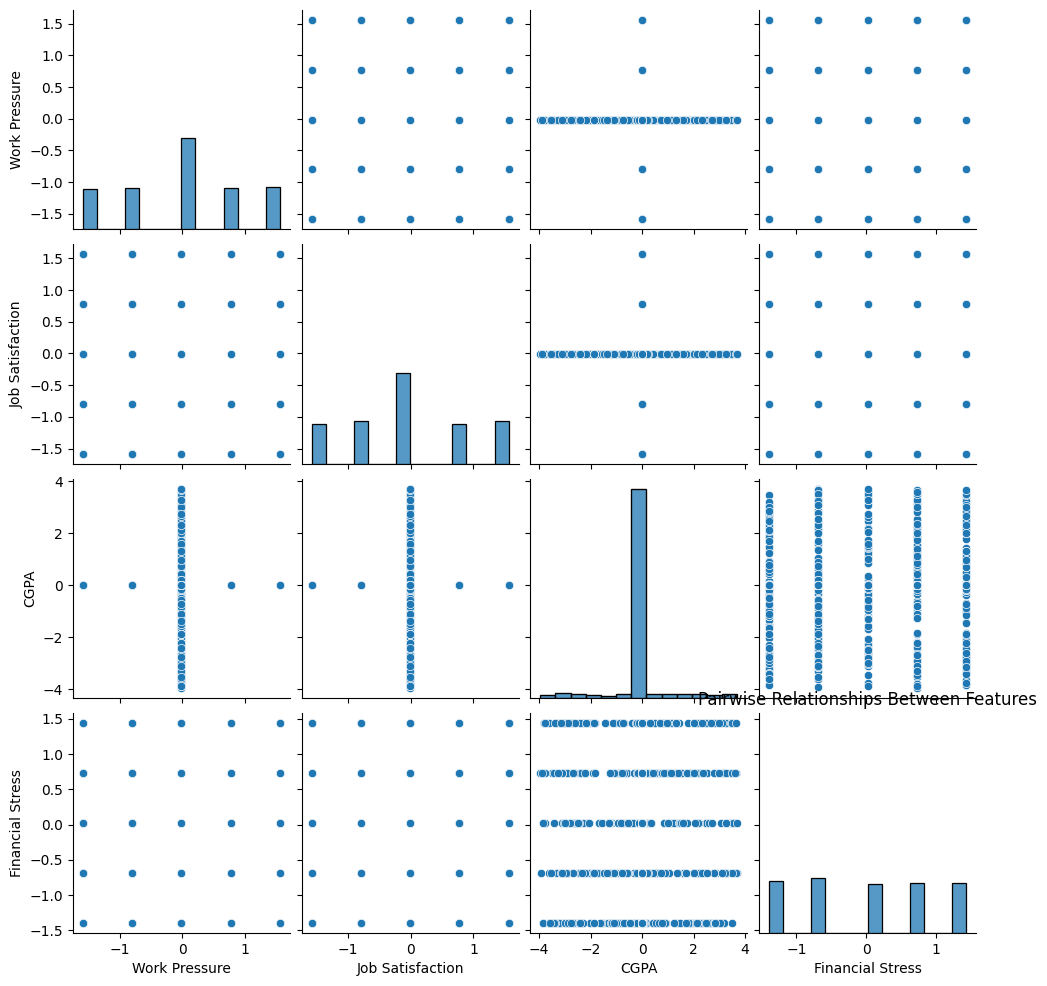

In [11]:
# Pairplot for selected features
selected_features = ['Work Pressure', 'Job Satisfaction', 'CGPA', 'Financial Stress']
sns.pairplot(data[selected_features])
plt.title('Pairwise Relationships Between Features')
plt.show()


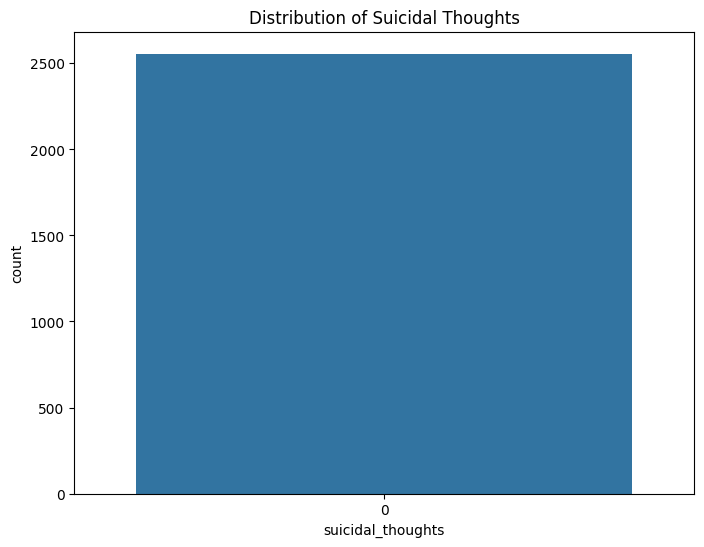

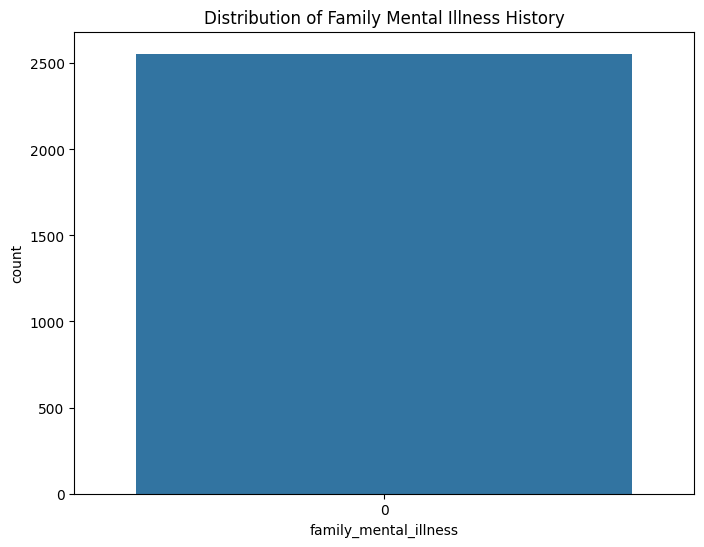

In [12]:
# Bar plot for Suicidal Thoughts
plt.figure(figsize=(8, 6))
sns.countplot(x='suicidal_thoughts', data=data)
plt.title('Distribution of Suicidal Thoughts')
plt.show()

# Bar plot for Family Mental Illness History
plt.figure(figsize=(8, 6))
sns.countplot(x='family_mental_illness', data=data)
plt.title('Distribution of Family Mental Illness History')
plt.show()


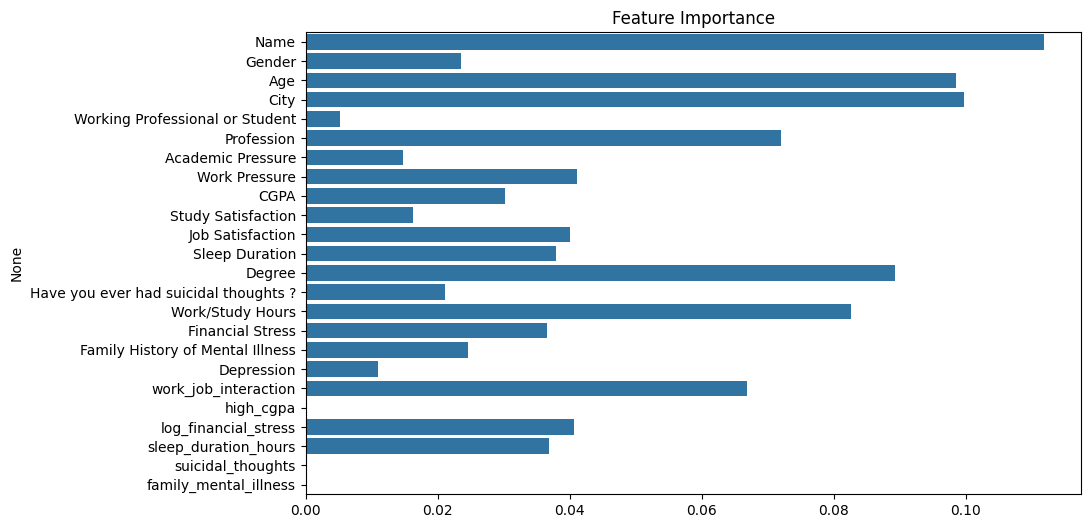

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'target' is the label for predicting mental health outcomes (e.g., depression diagnosis)
X = data.drop(columns=['Dietary Habits'])
y = data['Dietary Habits']

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()
